# Keyphrase Extraction in multi-documents accounting with geospacial associations

This is a exploratory notebook.

In [1]:
from geo_kpe_multidoc.evaluation.evaluation_tools import postprocess_dataset_labels, postprocess_res_labels, evaluate_kp_extraction
from nltk.stem import PorterStemmer
import os
import joblib
import pandas as pd
from geo_kpe_multidoc import GEO_KPE_MULTIDOC_OUTPUT_PATH, GEO_KPE_MULTIDOC_CACHE_PATH
lemmer = "en"
stemmer = PorterStemmer()

2023-04-12 17:08:21.748323: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-12 17:08:22.104941: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-12 17:08:22.108084: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 17:08:23.342305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def load_results(path, filter_ = "*"):
    results, true_labels = {}, {}
    with os.scandir(path) as it:
        for entry in it:
            if not entry.name.startswith('.') and entry.is_file() and entry.name.startswith(filter_):
                r = joblib.load(entry)
                results[r["doc"]] = [(r["top_n_scores"], [name for name, score in r["top_n_scores"]])]
                true_labels[r["doc"]] = [r["gold"]]
    return results, true_labels

In [ ]:
a = [(idx, id, kpe_model.model.embedding_model.tokenize([text])['input_ids'].size()[1]) 
     for idx, (id, text, _) in enumerate(data)]

sorted(a, key = lambda item: item[2])[:100]

# [(22, 'AP880901-0052', 18),
#  (93, 'AP900323-0036', 25),
#  (82, 'AP891116-0191', 45),
#  (42, 'AP881222-0089', 51),
#  (94, 'AP900416-0188', 53),
#  (84, 'AP891210-0079', 60),
#  (85, 'AP891213-0004', 79),
#  (194, 'LA042190-0060', 196),
#  (231, 'LA110490-0184', 211),
#  (200, 'LA051190-0185', 234),
#  (101, 'AP900512-0038', 243),
#  (60, 'AP890403-0123', 268),
#  (133, 'FBIS4-67721', 332),
#  (21, 'AP880816-0234', 334),
#  (138, 'FT921-9310', 336),
#  (188, 'LA030889-0163', 340),
#  (95, 'AP900419-0121', 344),
#  (1, 'AP880217-0175', 352),
#  (146, 'FT923-5835', 352),
#  (164, 'FT934-11014', 353),
#  (287, 'WSJ910304-0002', 375),
#  (230, 'LA103089-0070', 384),
#  (223, 'LA100789-0007', 387),
#  (23, 'AP880902-0062', 392),
#  (185, 'LA021689-0227', 396),
#  (174, 'FT941-575', 406),
#  (291, 'WSJ910529-0003', 409),
#  (142, 'FT922-8860', 413),
#  (130, 'FBIS4-4674', 432),
#  (145, 'FT923-5797', 436),
#  (298, 'WSJ910718-0143', 436),
#  (171, 'FT941-1547', 437),
#  (97, 'AP900426-0054', 439),
#  (100, 'AP900511-0159', 439),
#  (154, 'FT931-3883', 446),
#  (264, 'SJMN91-06290146', 447),
#  (70, 'AP890722-0081', 451),
#  (113, 'AP901010-0036', 452),
#  (71, 'AP890801-0025', 468),
#  (227, 'LA102189-0151', 469),
#  (80, 'AP891028-0022', 483),
#  (90, 'AP900316-0028', 484),
#  (259, 'SJMN91-06212161', 487),
#  (152, 'FT931-11394', 496),
#  (55, 'AP890314-0237', 497),
#  (123, 'FBIS3-22942', 501),
#  (3, 'AP880330-0119', 509),
#  (13, 'AP880629-0159', 509),
#  (242, 'SJMN91-06136305', 510),
#  (37, 'AP881126-0007', 514),
#  (166, 'FT934-13350', 519),
#  (56, 'AP890316-0018', 522),
#  (8, 'AP880517-0226', 523),
#  (49, 'AP890131-0280', 527),
#  (52, 'AP890302-0063', 529),
#  (64, 'AP890511-0126', 529),
#  (107, 'AP900625-0160', 531),
#  (40, 'AP881211-0027', 533),
#  (156, 'FT932-5855', 541),
#  (122, 'FBIS3-11919', 550),
#  (96, 'AP900424-0035', 569),
#  (5, 'AP880409-0015', 570),
#  (9, 'AP880520-0264', 576),
#  (29, 'AP880926-0203', 580),
#  (78, 'AP891006-0029', 585),
#  (220, 'LA092790-0010', 590),
#  (216, 'LA081890-0039', 596),
#  (198, 'LA043089-0197', 597),
#  (119, 'AP901130-0060', 601),
#  (136, 'FT911-5176', 608),
#  (148, 'FT923-6038', 614),
#  (79, 'AP891017-0204', 619),
#  (41, 'AP881216-0017', 627),
#  (66, 'AP890704-0043', 632),
#  (257, 'SJMN91-06193235', 645),]

In [3]:
# filter_ = ['AP880901-0052',
#  'AP900323-0036',
#  'AP891116-0191',
#  'AP881222-0089',
#  'AP900416-0188',
#  'AP891210-0079',
#  'AP891213-0004',
#  'LA042190-0060',
#  'LA110490-0184',
#  'LA051190-0185']

filter_ = ['LA042190-0060',
 'LA110490-0184',
 'LA051190-0185',
 'AP900512-0038',
 'AP890403-0123',
 'FBIS4-67721',
 'AP880816-0234',
 'FT921-9310',
 'LA030889-0163',
 'AP900419-0121']


results, true_labels = load_results(os.path.join(GEO_KPE_MULTIDOC_CACHE_PATH, "DUC2001-EmbedRank-Longformer"), tuple(filter_))

longformer_DUC2001_EmbedRank_F1 = evaluate_kp_extraction(postprocess_res_labels(results, stemmer, lemmer), postprocess_dataset_labels(true_labels, stemmer, lemmer))

longformer_DUC2001_EmbedRank_F1.index.name = "doc"
# longformer_DUC2001_EmbedRank_F1.to_csv("../../outputs/DUC2001_EmbedRank_longformer_F1.20230412.csv")


                 Precision    Recall        F1        MAP      nDCG    Precision_5    Recall_5      F1_5    Precision_10    Recall_10     F1_10    Precision_15    Recall_15     F1_15
-------------  -----------  --------  --------  ---------  --------  -------------  ----------  --------  --------------  -----------  --------  --------------  -----------  --------
AP890403-0123    0.0645161  0.5       0.114286  0.0525641  0.200128            0      0         0                    0       0         0               0.133333     0.5       0.210526
LA051190-0185    0.225806   0.875     0.358974  0.381341   0.649986            0.4    0.25      0.307692             0.3     0.375     0.333333        0.333333     0.625     0.434783
FT921-9310       0.15625    1         0.27027   0.286177   0.521982            0.2    0.2       0.2                  0.3     0.6       0.4             0.266667     0.8       0.4
AP900512-0038    0.206897   0.75      0.324324  0.140783   0.372882            0      0   

In [4]:
results, true_labels = load_results(os.path.join(GEO_KPE_MULTIDOC_CACHE_PATH, "DUC2001-EmbedRank-sbert"), tuple(filter_))

sbert_DUC2001_EmbedRank_F1 = evaluate_kp_extraction(postprocess_res_labels(results, stemmer, lemmer), postprocess_dataset_labels(true_labels, stemmer, lemmer))
sbert_DUC2001_EmbedRank_F1.index.name = "doc"

                 Precision    Recall        F1       MAP      nDCG    Precision_5    Recall_5      F1_5    Precision_10    Recall_10     F1_10    Precision_15    Recall_15     F1_15
-------------  -----------  --------  --------  --------  --------  -------------  ----------  --------  --------------  -----------  --------  --------------  -----------  --------
AP890403-0123    0.0645161  0.5       0.114286  0.113095  0.269183            0      0         0                    0.2     0.5       0.285714        0.133333     0.5       0.210526
LA051190-0185    0.225806   0.875     0.358974  0.347542  0.583997            0.2    0.125     0.153846             0.3     0.375     0.333333        0.285714     0.5       0.363636
FT921-9310       0.15625    1         0.27027   0.234921  0.484263            0      0         0                    0.3     0.6       0.4             0.2          0.6       0.3
AP900512-0038    0.206897   0.75      0.324324  0.175121  0.405137            0      0         

In [2]:
longformer_DUC2001_EmbedRank_F1 = pd.read_csv(os.path.join(GEO_KPE_MULTIDOC_OUTPUT_PATH, "DUC2001_EmbedRank_longformer_F1.20230412.csv"))
sbert_DUC2001_EmbedRank_F1 = pd.read_csv(os.path.join(GEO_KPE_MULTIDOC_OUTPUT_PATH, "DUC2001_EmbedRank_sbert_F1.20230412.csv"))

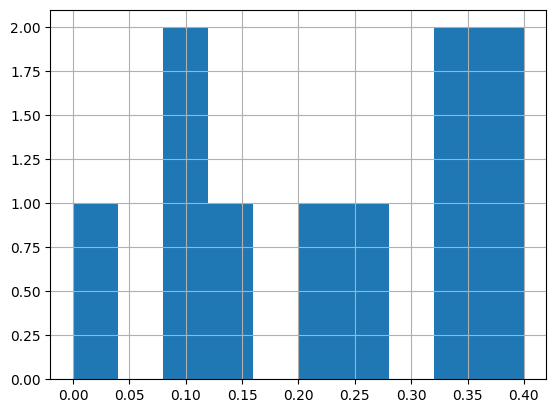

In [7]:
import matplotlib.pyplot as plt

longformer_DUC2001_EmbedRank_F1["F1_10"].hist()

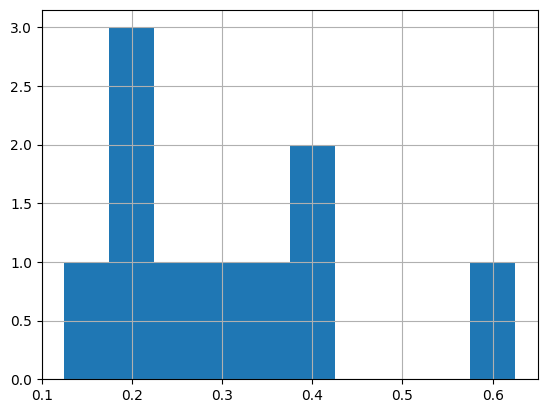

In [8]:
sbert_DUC2001_EmbedRank_F1["F1_10"].hist()

In [9]:
pd.concat([longformer_DUC2001_EmbedRank_F1, sbert_DUC2001_EmbedRank_F1])

,Precision,Recall,F1,MAP,nDCG,Precision_5,Recall_5,F1_5,Precision_10,Recall_10,F1_10,Precision_15,Recall_15,F1_15
doc,,,,,,,,,,,,,,
AP890403-0123,0.064516,0.500000,0.114286,0.052564,0.200128,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.133333,0.500000,0.210526
LA051190-0185,0.225806,0.875000,0.358974,0.381341,0.649986,0.4,0.250000,0.307692,0.3,0.375000,0.333333,0.333333,0.625000,0.434783
FT921-9310,0.156250,1.000000,0.270270,0.286177,0.521982,0.2,0.200000,0.200000,0.3,0.600000,0.400000,0.266667,0.800000,0.400000
AP900512-0038,0.206897,0.750000,0.324324,0.140783,0.372882,0.0,0.000000,0.000000,0.1,0.125000,0.111111,0.200000,0.375000,0.260870
FBIS4-67721,0.086957,0.800000,0.156863,0.318571,0.598669,0.2,0.200000,0.200000,0.2,0.400000,0.266667,0.200000,0.600000,0.300000
LA042190-0060,0.218750,1.000000,0.358974,0.391631,0.701594,0.2,0.142857,0.166667,0.3,0.428571,0.352941,0.266667,0.571429,0.363636
AP880816-0234,0.163265,1.000000,0.280702,0.251049,0.521157,0.2,0.125000,0.153846,0.1,0.125000,0.111111,0.266667,0.500000,0.347826
LA030889-0163,0.242424,0.888889,0.380952,0.311963,0.631932,0.2,0.111111,0.142857,0.2,0.222222,0.210526,0.200000,0.333333,0.250000
AP900419-0121,0.095238,0.666667,0.166667,0.118056,0.351032,0.2,0.166667,0.181818,0.1,0.166667,0.125000,0.133333,0.333333,0.190476


In [11]:
longformer_DUC2001_EmbedRank_F1.stack(fill_value="hahaha")

TypeError: stack() got an unexpected keyword argument 'fill_value'

In [13]:
new_index = pd.MultiIndex.from_frame(longformer_DUC2001_EmbedRank_F1.columns.to_frame())

In [16]:
pd.MultiIndex.from_arrays(["hahhaa"]*len(new_index, new_index])

AttributeError: 'MultiIndex' object has no attribute 'dim'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fdc1bb820>,
      dtype=object)

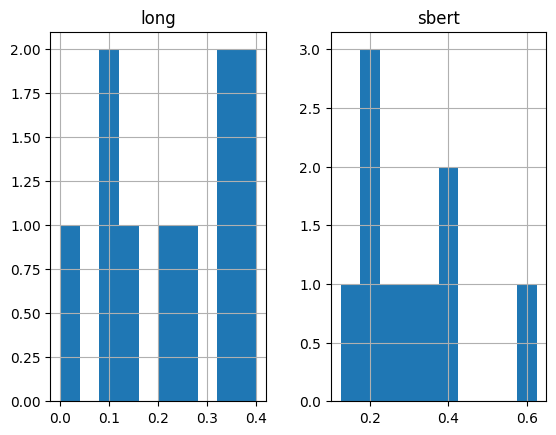

In [23]:
longformer_DUC2001_EmbedRank_F1["model"] = 'long'
sbert_DUC2001_EmbedRank_F1["model"] = 'sbert'
pd.concat([longformer_DUC2001_EmbedRank_F1.set_index('model', append=True), sbert_DUC2001_EmbedRank_F1.set_index('model', append=True) ]).unstack(level=1).loc[:, "F1_10"].hist()


